In [398]:
import pickle as cPickle
import gzip

import numpy as np
%pylab inline 
import matplotlib.pyplot as pl
import cv2
# from PIL import Image
# import PIL.ImageOps 

# import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


100

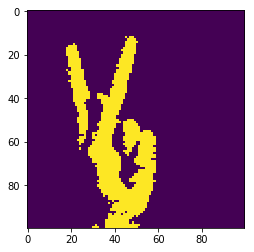

In [399]:
dirPath = 'ASL/signs/'
import os
signs = ''
trainingX = []
trainingY = []
training = []
width = 100
height = 100
for fl in os.listdir(dirPath):
    fname = dirPath+fl
    base=os.path.basename(fname)
    symbol = os.path.splitext(base)[0]  
    im = cv2.imread(fname,0)
    ret,im = cv2.threshold(im,127,1,cv2.THRESH_BINARY_INV)
#     print('im',im)
#     print('ret',ret)
#    print(type(im))
    im = cv2.resize(im,(width,height))
#    im = abs(im - 255)
#    im = im/255
    imshow(im)
#     im = im.resize((100,100),Image.ANTIALIAS)
#     (width, height) = im.size
    imgB = np.asarray(im).reshape(-1)
    trainingX.append(imgB)
    trainingY.append(symbol)
    signs += symbol
    pass
signs = sorted(signs)
# signs.index('z')
# print(width,height)
training.append(trainingX)
training.append(trainingY)
#print(training[0][0])
for el in training[0][0]:
     print (el)
len(training[0][0])
len(im)

In [400]:
def vectorized_result(j,size):
    e = np.zeros((26, size))
#     print('j:',j)
#     print('size',size)
    cnt=0
    for i in j:
        idx = signs.index(i)
        e[idx][cnt] = 1.0
        cnt+=1
    return e

In [401]:
Xdisplay = np.reshape(training[0][0],(width,height))
y = vectorized_result(training[1][0:3],3)
# pl.imshow(Xdisplay,cmap='Greys')
X = np.float32(training[0][0:3])

In [402]:
class Neural_Network(object):
    def __init__(self,width,height):        
        self.inputLayerSize = width*height
        self.outputLayerSize = 26
        self.hiddenLayerSize = 30

        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        delta2 = np.float32(np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2))
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1, dJdW2
    
    def getParams(self):
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [403]:
NN = Neural_Network(width,height)

In [404]:
costarr=[]
for i in range(0,500):
    for j in range(0,len(training[0]),2):
#     for j in range(0,10,2): # len(training[0]),2):
#         print(j)
        y = vectorized_result(training[1][j:j+2],2)
#         print('y',y.shape)
        X = np.float32(training[0][j:j+2])
#         X = X.reshape(X.shape[0],1)
#         print('X',X.shape)
        cost = NN.costFunction(X,y.T)
        costarr.append(cost)
        dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)
        scalar = 1
        NN.W1 = NN.W1 - scalar*dJdW1
        NN.W2 = NN.W2 - scalar*dJdW2
# print(costarr)

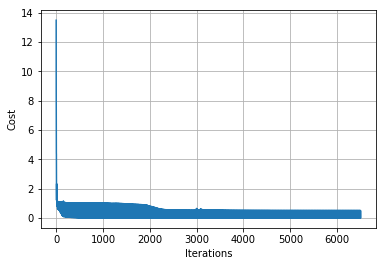

In [405]:
plot(costarr)
grid(1)
xlabel('Iterations')
ylabel('Cost')
# print (costarr)

In [406]:
X = np.float32(training[0][0:3])
result=NN.forward(X)
result=np.around(result, decimals = 2)
print(result)
yarr=training[1][0:3]
res=[np.argmax(i) for i in  result]
print([signs[sign] for sign in res])
print('yarr',yarr)
sum(int(x == y) for (x, y) in list(zip(res,yarr)))

[[ 0.    0.01  0.    0.01  0.    0.    0.    0.    0.    0.    0.    0.01
   0.    0.    0.    0.    0.01  0.02  0.    0.    0.    0.    0.    0.01
   0.01  0.98]
 [ 0.    0.    0.    0.01  0.    0.02  0.03  0.02  0.    0.    0.    0.    0.
   0.03  0.    0.    0.    0.    0.95  0.    0.    0.02  0.    0.03  0.01
   0.  ]
 [ 0.    0.    0.    0.97  0.    0.    0.    0.    0.    0.    0.    0.
   0.01  0.    0.    0.    0.01  0.    0.01  0.02  0.    0.01  0.    0.    0.
   0.01]]
['z', 's', 'd']
yarr ['z', 's', 'd']


0

In [407]:
# ?cv2.imread